## Gradient Descent and Regression Neurons

In the next step of our exploration of machine learning models, we delve into the mechanics of **linear regression** and **gradient descent**. Linear regression aims to predict a dependent variable based on one or more independent variables by fitting a line (or a hyperplane in higher dimensions). The model is mathematically represented as:

$$
y = \mathbf{w}^\top \mathbf{x} + b
$$

where $\mathbf{w}$ represents the vector of weights, $\mathbf{x}$ is the vector of input features, and $\mathbf{b}$ is the bias. Unlike classification models that may use non-linear activation functions, the linear regression model employs a linear activation, making the output a direct linear function of the input.


### Cost Function and Gradient Descent

The training process involves minimizing a cost function, typically the Mean Squared Error (MSE), defined as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

where $\hat{y}_i$ is the predicted value and $y_i$ is the actual value for the $i$-th observation. The goal of optimization is to find weights $\mathbf{w}$ and bias $\mathbf{b}$ that minimize this cost function.

**Gradient descent** is an iterative optimization algorithm used to minimize the MSE. It updates the parameters in the direction opposite to the gradient of the cost function with respect to the parameters. The updates are governed by the learning rate $\alpha\$, which determines the step size:

$$
\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_\mathbf{w} \text{MSE}, \quad b \leftarrow b - \alpha \nabla_b \text{MSE}
$$

Two prevalent forms of gradient descent are:

- **Batch Gradient Descent**: Computes the gradient using the entire dataset. This method is thorough but can be computationally expensive.
- **Stochastic Gradient Descent (SGD)**: Computes the gradient from a randomly selected subset of data, which provides faster convergence but with a higher variance in the steps.

### Training Process

During training, the linear regression model iteratively adjusts the weights and bias using gradient descent, converging to the values that minimize the cost function. The effectiveness of the training process depends heavily on the choice of the learning rate and the form of gradient descent used.

This trained model can then be used to make predictions on new data, completing the cycle from theoretical modeling to practical application.

---

Below we implement the Gradient Descent model to understand how Minutes Played (MP) has a relationship with Salary.

In [1]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

def linear_activation(z):
    return z

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_theme()

# Load the dataset
df = pd.read_csv("salary.csv")
df.head()

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [3]:
#Let's predict salary based on minutes played
X = df[["MP"]].values
y = df["Salary"].values

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

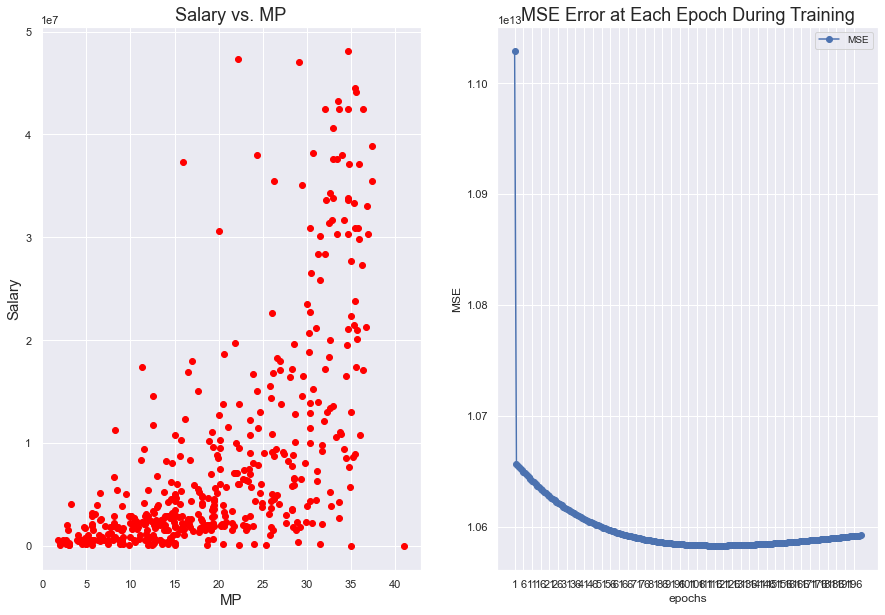

In [4]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 200)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "red")
domain = np.linspace(35,43,40)
ax1.set_xlabel("MP", fontsize = 15)
ax1.set_ylabel("Salary", fontsize = 15)
ax1.set_title("Salary vs. MP", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_[:],
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

As we can see, there is a positive association between Minutes Played (MP) and Salary and as a result, our optimal number of epochs does yield a decent MSE of around 1, which means that on average we are able to estimate average salary within $10 million given a player's average minutes played per game.

Next let's see what happens when we adjust the learning rates

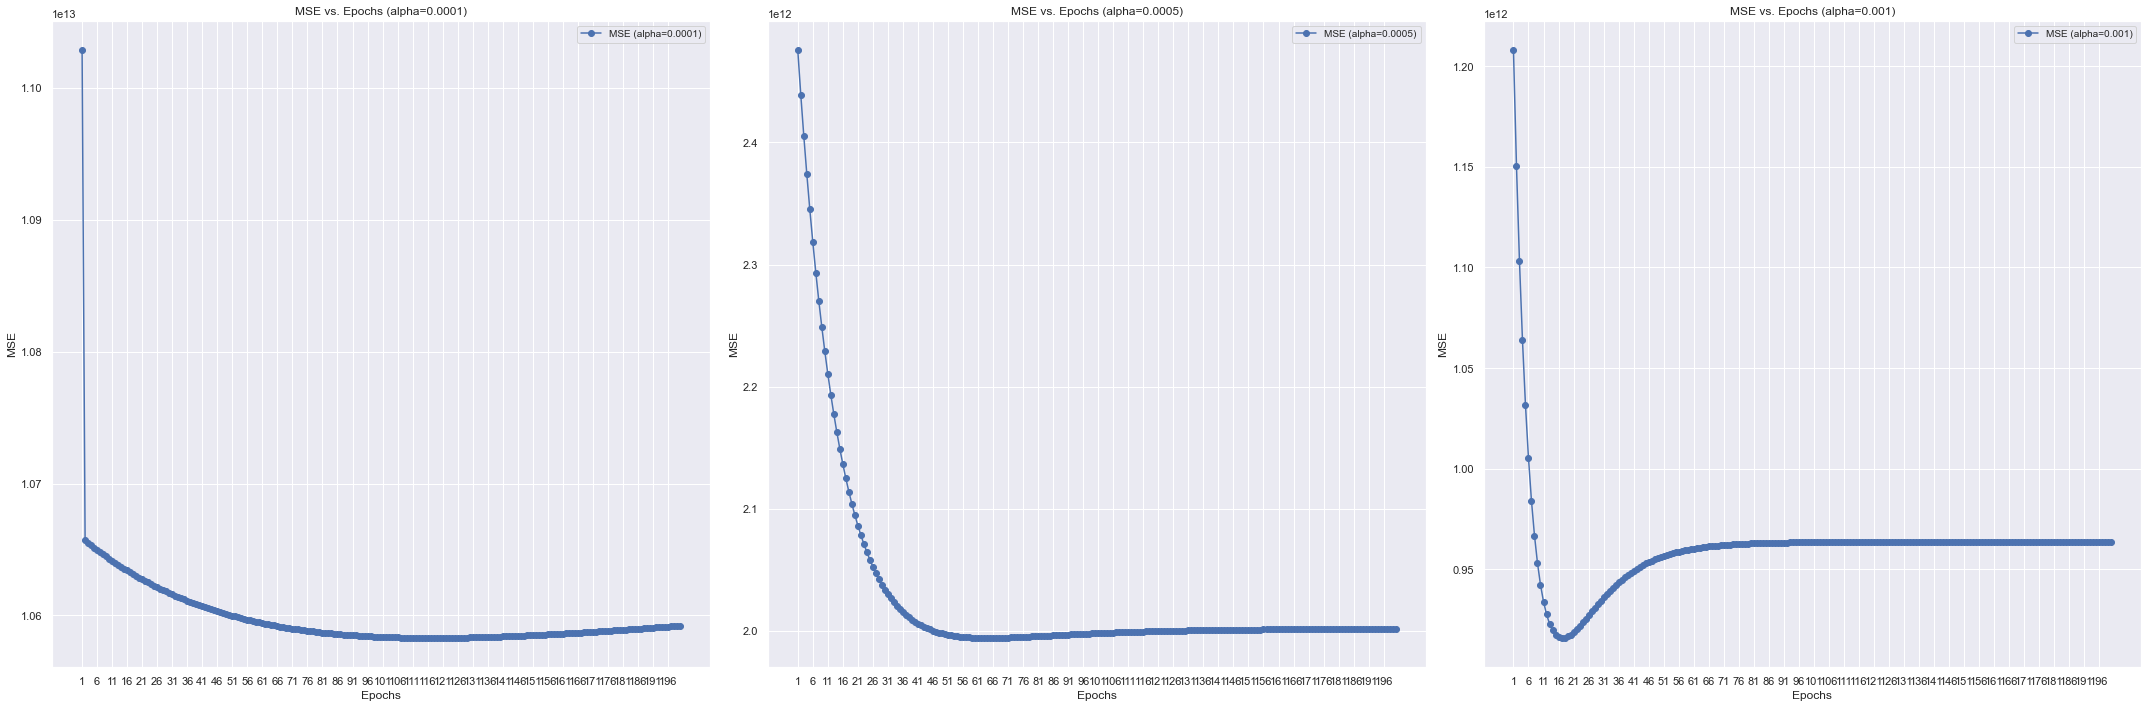

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming SingleNeuron and linear_activation are already defined and imported
# Define different alpha values to test
alphas = [0.0001, 0.0005, 0.001]
errors = []

# Train the model with each alpha and store the errors
for alpha in alphas:
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha=alpha, epochs=200)
    errors.append(node.errors_)

# Number of plots
n_plots = len(alphas)
fig, axes = plt.subplots(1, n_plots, figsize=(10*n_plots, 10))

# Check if we have more than one plot, otherwise index the axes directly
if n_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Plotting
for i, ax in enumerate(axes):
    ax.plot(range(1, len(errors[i]) + 1),
            errors[i],
            marker="o",
            label=f"MSE (alpha={alphas[i]})")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("MSE")
    ax.set_xticks(range(1, len(errors[i]) + 1, 5))
    ax.legend(fontsize=10)
    ax.set_title(f"MSE vs. Epochs (alpha={alphas[i]})", fontsize=12)

plt.tight_layout()
plt.show()


As we can see, when we adjust the learning rates, our model fit, mean square error, and optimal number of epochs shift. Given our sample learning rates, the learning rate that yields the small MSE is .001